In [ ]:
#hide
#skip
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 194kB 4.5MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 


In [ ]:
from fastai.vision.all import *

In [ ]:
!nvidia-smi

Thu Oct 15 06:40:49 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |     10MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!unzip "/content/drive/My Drive/LandCoverData.zip"

In [ ]:
!mkdir LandCoverData/images

mkdir: cannot create directory ‘LandCoverData/images’: File exists


In [ ]:
!mkdir LandCoverData/labels

mkdir: cannot create directory ‘LandCoverData/labels’: File exists


In [ ]:
!mv LandCoverData/M*.jpg LandCoverData/images

In [ ]:
!mv LandCoverData/N*.jpg LandCoverData/images

In [ ]:
!mv LandCoverData/M*.png LandCoverData/labels

In [ ]:
!mv LandCoverData/N*.png LandCoverData/labels

In [ ]:
path = Path("LandCoverData")
path

Path('LandCoverData')

In [ ]:
codes = np.array(["building", "woodland", "water", "Background"])
codes

array(['building', 'woodland', 'water', 'Background'], dtype='<U10')

In [ ]:
fnames = get_image_files(path/"images")


In [ ]:
fnames

(#10674) [Path('LandCoverData/images/N-33-139-C-d-2-4_164.jpg'),Path('LandCoverData/images/N-34-94-A-b-2-4_247.jpg'),Path('LandCoverData/images/M-34-51-C-b-2-1_132.jpg'),Path('LandCoverData/images/N-33-130-A-d-4-4_185.jpg'),Path('LandCoverData/images/M-33-7-A-d-2-3_267.jpg'),Path('LandCoverData/images/N-33-60-D-d-1-2_34.jpg'),Path('LandCoverData/images/M-34-65-D-d-4-1_127.jpg'),Path('LandCoverData/images/M-33-20-D-d-3-3_309.jpg'),Path('LandCoverData/images/N-34-140-A-b-4-2_273.jpg'),Path('LandCoverData/images/M-34-65-D-d-4-1_27.jpg')...]

In [ ]:
def label_func(fn): return path/"labels"/f"{fn.stem}_m{'.png'}"


In [ ]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=3, fnames = fnames, label_func = label_func, codes = codes
)

In [ ]:
#camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),get_items = get_image_files, get_y = label_func, splitter=RandomSplitter(), batch_tfms=aug_transforms(size=(120,160)))

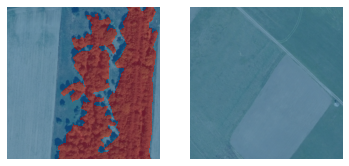

In [ ]:
dls.show_batch()

In [ ]:
learn = unet_learner(dls, resnet18)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,time
0,0.507592,0.451692,16:36


epoch,train_loss,valid_loss,time
0,0.308759,0.257571,16:59
1,0.175569,0.164336,16:59
2,0.123748,0.146746,17:00


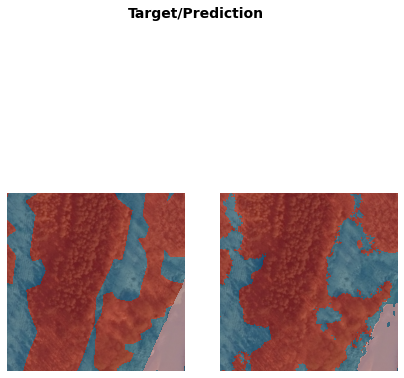

In [ ]:
learn.show_results( )


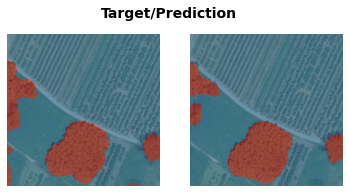

In [ ]:
learn.show_results(1)


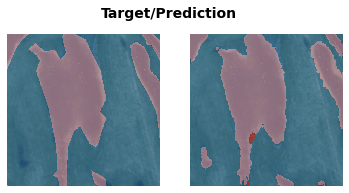

In [ ]:
learn.show_results()

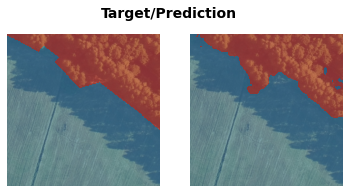

In [ ]:
learn.show_results()